In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


input=np.genfromtxt("data.csv",delimiter=",")
# print(input)

In [2]:
x=input[:,[0]]
y=input[:,[1]]
# print(x,y)

## Batch Gradient Descent

The dataset is passed in batches. Each batch is a collection of several inputs which are predicted in one go and the cost is found for all of them together. Hence the model after every iteration learns to predict accurately for a couple of inputs and hence the goes on. Therefore the cost doesnt jump or shoot much after every iteration and hence leads to smoother cost curve as we will see below.

final cost :  [56.32398835]
finished learning


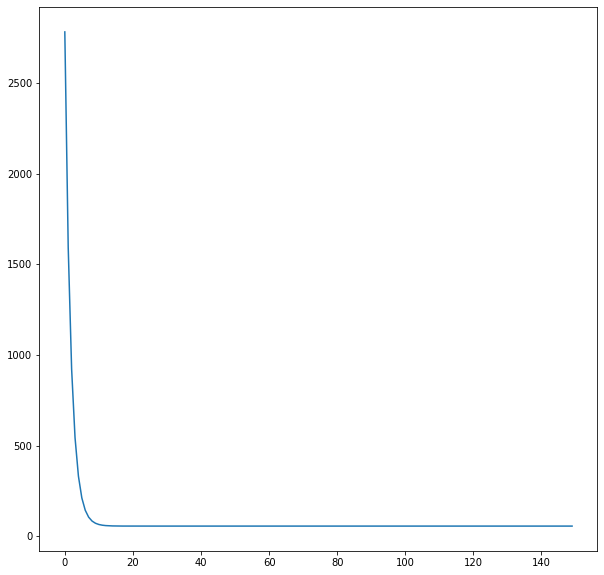

In [3]:
"""
Training the model. Do play with the learning rates and see what happens
"""

lr=0.0001
m=0.0
c=0.0
n=np.shape(x)[0]
history=[]
m_history=[]
c_history=[]
for i in range(150):
    y_pred=m*x+c
    cost=1/(2*n)*sum((y_pred-y)**2)
    m_deriv=1/n*(y_pred-y).T@(x)
    c_deriv=1/n*sum(y_pred-y)
    m=m-lr*m_deriv
    c=c-lr*c_deriv
    history.append(cost[0])
    m_history.append(m)
    c_history.append(c)

print("final cost : ",cost)
print("finished learning")

hist=np.arange(len(history))
plt.figure(figsize=(10,10))
plt.plot(hist,history)
plt.show()

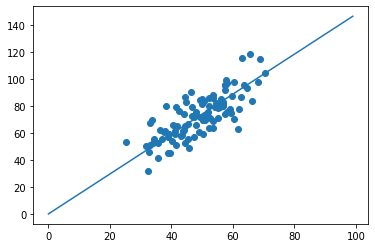

In [4]:
X=np.arange(0,100,1)
Y=m*X+c
plt.scatter(x,y)
plt.plot(X,Y[0,:])

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


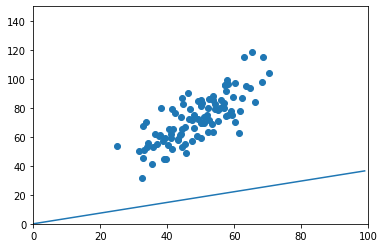

In [5]:
#animating this!!

%matplotlib inline
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib import animation, rc

fig = plt.figure()
plt.xlim(0,100)
plt.ylim(0,150)
plt.scatter(x,y)
line, = plt.plot([], [])

def animate(i):
    m=m_history[i]
    c=c_history[i]
    X=np.arange(0,100,1)
    Y=m*X+c
    line.set_data(X, Y)
    return line,

anim = FuncAnimation(fig, animate,frames=len(m_history))
anim.save('function.gif', writer='imagemagick', fps=5)


### animation result
![anim-demo](function.gif)

## Stochastic Gradient Descent

The dataset is passed in one at a time. Hence the model after every iteration is fit to perform well for that particular dataset initially. Hence for the next iteration the cost would fluctuate. Eventually the model will fit but its just that the model makes sudden drastic changes

However stochastic gradient descent is extremely useful when we want to train lots of data and when we have insufficient memory to hold the input in batches

final cost :  42.18096312436923
finished learning


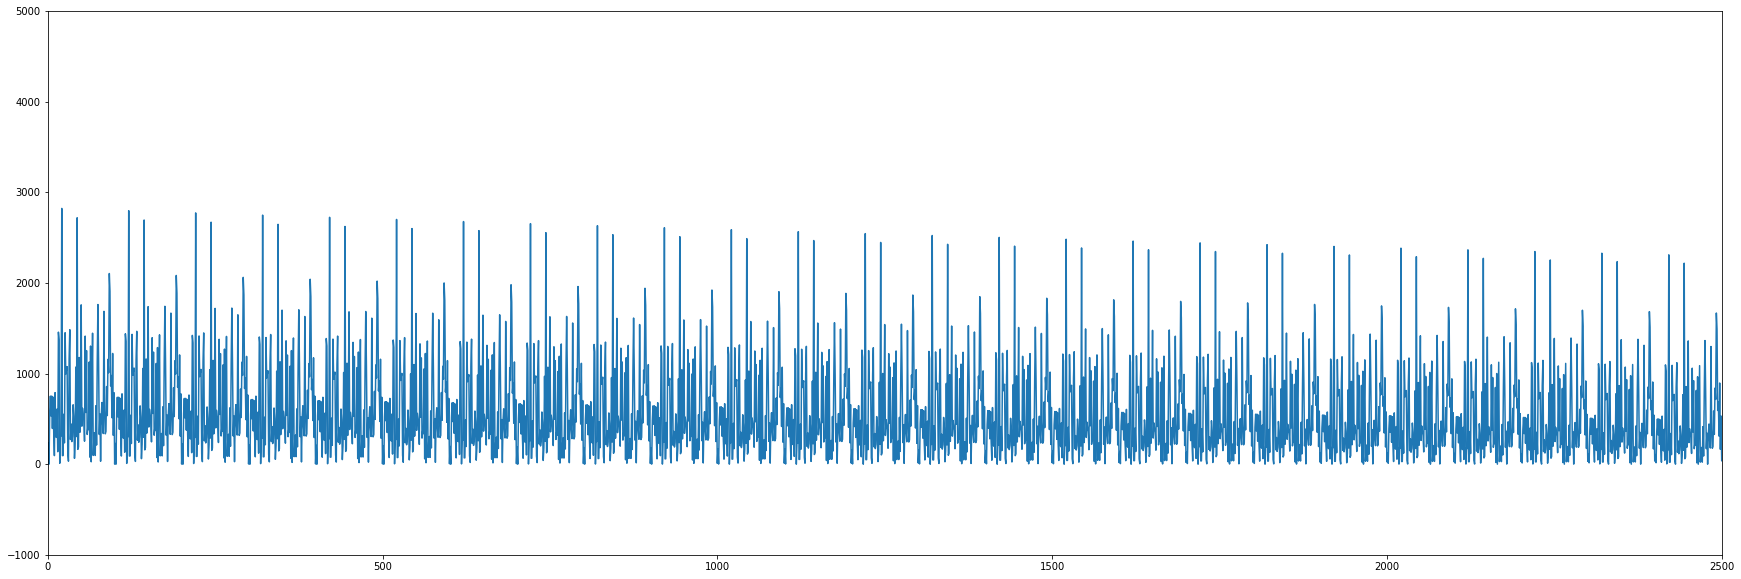

In [7]:
"""
Training the model. Do play with the learning rates and see what happens
"""

lr=0.0001
m=0.0
c=0.0
n=np.shape(x)[0]
history=[]
m_history=[]
c_history=[]
for i in range(250):
    for i in range(n):
        y_pred=x[i][0]+c
        cost=(y_pred-y[i][0])**2
        m_deriv=(y_pred-y[i][0])*(x[i][0])
        c_deriv=(y_pred-y[i][0])
    
        m=m-lr*m_deriv
        c=c-lr*c_deriv
        history.append(cost)
        m_history.append(m)
        c_history.append(c)

print("final cost : ",cost)
print("finished learning")

hist=np.arange(len(history))
plt.figure(figsize=(30,10))
plt.xlim(0,len(c_history)/10)
plt.ylim(-1000,5000)
plt.plot(hist,history)
plt.show()